# Model 1

PLS model as in modelID P076 as in Walsh et al. (2024).

### References

Walsh, J., Neupane, A., & Li, M. (2024). Evaluation of 1D convolutional neural network in estimation of mango dry matter content. Spectrochimica Acta Part A: Molecular and Biomolecular Spectroscopy, 311. https://doi.org/10.1016/j.saa.2024.124003

## Setup

In [7]:
import pandas as pd
import pickle

from sklearn.cross_decomposition import PLSRegression

from utils import peval

In [8]:
# read in prepared dataset from previous step
df = pd.read_pickle("../../3_preprocessing/data/prepared/pretreatment_2_scaled_partition_1_outlier_flag_1.pkl").sort_values(by="sample_order_1")
x_cols = df.filter(regex="^\d+", axis=1).columns
descriptive_cols = [col for col in df.columns if col not in x_cols]
df

,partition,train_partition,subsequent_flag_1,sample_order_1,partition_ext,origin,population,date,season,region,...,963_snv_savgol_d2,966_snv_savgol_d2,969_snv_savgol_d2,972_snv_savgol_d2,975_snv_savgol_d2,978_snv_savgol_d2,981_snv_savgol_d2,984_snv_savgol_d2,987_snv_savgol_d2,990_snv_savgol_d2
36408,train,calibration,0,0,,nich,105600,2017-10-09,2017,NT,...,0.001000,0.000945,0.001036,0.001200,0.000980,0.000758,0.000634,0.000492,0.000325,0.000202
45878,train,calibration,0,1,,nich,107201,2017-10-27,2017,NT,...,-0.000451,-0.000340,-0.000107,0.000123,0.000326,0.000566,0.000333,0.000188,-0.000070,-0.000161
44252,train,calibration,0,3,,nich,106900,2017-10-23,2017,NT,...,0.004671,0.004123,0.003493,0.002681,0.002069,0.001699,0.001328,0.001180,0.001205,0.001004
24234,train,calibration,0,4,,nich,103109,2016-10-14,2016,NT,...,-0.004090,-0.004185,-0.003804,-0.002974,-0.002479,-0.002196,-0.001936,-0.001723,-0.001468,-0.001200
22556,train,calibration,0,6,,nich,103105,2016-10-13,2016,NT,...,0.002162,0.001725,0.001254,0.000866,0.000652,0.000521,0.000357,0.000228,0.000039,-0.000089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71902,validation,calibration,1,85396,,nich,112500,2019-03-04,2018,QLD,...,-0.002980,-0.003562,-0.003637,-0.003398,-0.003270,-0.003357,-0.003221,-0.002897,-0.002447,-0.001958
6947,train,calibration,0,85397,,nich,100600,2015-10-23,2015,NT,...,0.003593,0.003322,0.002898,0.002253,0.001721,0.001565,0.001526,0.001352,0.001213,0.001200
48401,train,calibration,0,85398,,nich,107400,2017-11-17,2017,QLD,...,-0.003077,-0.002760,-0.002191,-0.001361,-0.000743,-0.000297,-0.000338,-0.000530,-0.000516,-0.000544
59457,validation,tunning,0,85399,,nich,109900,2018-08-07,2018,NT,...,-0.000221,-0.000232,-0.000202,-0.000155,-0.000006,0.000141,0.000254,0.000309,0.000064,-0.000179


## Build Model

In [9]:
# define the model variables
model = PLSRegression(
    n_components=11, 
    scale=False
)

# train the model
model.fit(
    X=df.query("partition == 'train'")[x_cols], 
    Y=df.query("partition == 'train'")["dry_matter"]
)

PLSRegression(n_components=11, scale=False)

## Test Model

In [10]:
df_preds = df[descriptive_cols].copy()
df_preds["y_true"] = df_preds["dry_matter"]
df_preds["y_pred"] = model.predict(df[x_cols])
df_preds

,partition,train_partition,subsequent_flag_1,sample_order_1,partition_ext,origin,population,date,season,region,cultivar,physio_stage,temp,reference_no,dry_matter,instrument,spectra_no,y_true,y_pred
36408,train,calibration,0,0,,nich,105600,2017-10-09,2017,NT,1201,green,undef,3391,18.060310,15016,37690,18.060310,18.625060
45878,train,calibration,0,1,,nich,107201,2017-10-27,2017,NT,caly,green,undef,4076,15.135730,15038,46920,15.135730,15.864243
44252,train,calibration,0,3,,nich,106900,2017-10-23,2017,NT,kp,green,undef,3943,22.901620,15029,45604,22.901620,20.577597
24234,train,calibration,0,4,,nich,103109,2016-10-14,2016,NT,r2e2,ripen,mid,1988,13.186000,15015,25544,13.186000,13.849288
22556,train,calibration,0,6,,nich,103105,2016-10-13,2016,NT,caly,ripen,low,1824,18.594000,15023,23782,18.594000,17.694735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71902,validation,calibration,1,85396,,nich,112500,2019-03-04,2018,QLD,caly,ripen,undef,7550,13.774184,18029,77108,13.774184,17.926089
6947,train,calibration,0,85397,,nich,100600,2015-10-23,2015,NT,kp,green,mid,214,12.187465,15029,6439,12.187465,14.886198
48401,train,calibration,0,85398,,nich,107400,2017-11-17,2017,QLD,hg,green,undef,4325,13.775450,15038,49711,13.775450,15.195198
59457,validation,tunning,0,85399,,nich,109900,2018-08-07,2018,NT,caly,ripen,undef,5425,15.969130,15027,60783,15.969130,15.621502


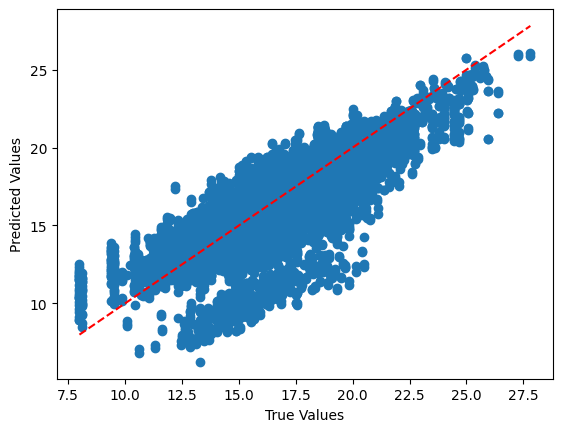

{'n': 17697,
 'r2': 0.572358834440906,
 'rmse': 1.6831137046671056,
 'sep': 1.631722074174265,
 'bias': 0.4129228325920652,
 'rpd': 1.5773925517114267}

In [11]:
test_partition = df_preds.query("partition == 'validation'")
metrics = peval.calculate_metrics(y_true=test_partition["y_true"], y_pred=test_partition["y_pred"])
metrics

## Output predictions and metrics

In [12]:
df_preds.to_pickle(f"data/predictions/model_1.pkl")
with open(f"data/metrics/model_1.pkl", "wb") as f:
    pickle.dump(metrics, f)